In [56]:
import pandas as pd
import numpy as np
import jl_to_df
import matplotlib.pyplot as plt

def get_other_ratings(file_name):
    data = jl_to_df.read_jl_file("data/"+file_name)

    data=data[['resto','title','content','rating','other_ratings_category','other_ratings_value']]
    is_empty=data['other_ratings_category'].apply(lambda x :True if len(x)==0 else False)
    data=data[-is_empty].reset_index(drop=True)
    data['other_ratings_value']=data['other_ratings_value'].apply(lambda x: [int(x[i])/10 for i in range(len(x))])
   
    categories=data.other_ratings_category
    ratings=data.other_ratings_value 
    for i in range(len(data)):
        for j,k in enumerate(categories[i]):
            data.loc[i,k]=ratings[i][j]
    data=data.drop(['other_ratings_value','other_ratings_category'] ,axis=1)   
    return data

In [39]:
cinnamon=get_other_ratings('Cinnamon.jl').drop(['Atmosphere'],axis=1)
bokan=get_other_ratings('Bokan_37.jl')
boisdale= get_other_ratings('Boisdale.jl').drop(['Atmosphere'],axis=1)
peninsula=get_other_ratings('Peninsula.jl')
ivy=get_other_ratings('Ivy.jl')

In [84]:
cinnamon['resto']='Cinnamon'
bokan['resto']='Bokan'
boisdale['resto']='Boisdale'
peninsula['resto']='Peninsula'
ivy['resto']='Ivy'

In [85]:
all_restos=bokan.append([cinnamon,boisdale,peninsula,ivy]).reset_index(drop='True')
average_ratings=all_restos.groupby('resto').mean()

In [156]:
average_ratings

,Value,Service,Food
resto,,,
Boisdale,3.470389,3.966611,4.017331
Bokan,3.833333,3.970238,4.273973
Cinnamon,3.477612,3.506667,3.750000
Ivy,3.878788,4.170000,4.230000
Peninsula,4.560000,4.851485,4.782178


In [144]:
import seaborn as sns
sns.set(style="whitegrid")

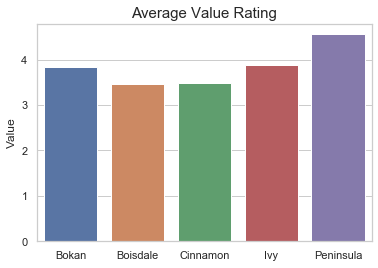

In [157]:
##Value
plt.title('Average Value Rating',fontsize=(15))
ax=sns.barplot(x=average_ratings.index,y=average_ratings['Value'],order=['Bokan','Boisdale','Cinnamon','Ivy','Peninsula']).set_xlabel("")

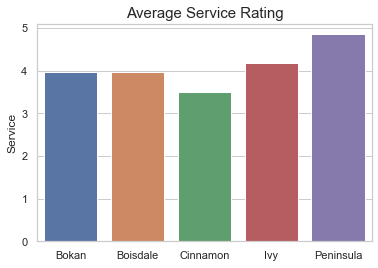

In [158]:
##Service
plt.title('Average Service Rating',fontsize=(15))
ax=sns.barplot(x=average_ratings.index,y=average_ratings['Service'],order=['Bokan','Boisdale','Cinnamon','Ivy','Peninsula']).set_xlabel("")

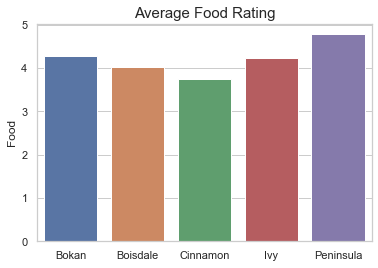

In [159]:
##Food
plt.title('Average Food Rating',fontsize=(15))
ax=sns.barplot(x=average_ratings.index,y=average_ratings['Food'],order=['Bokan','Boisdale','Cinnamon','Ivy','Peninsula']).set_xlabel("")